# Simple Linear Regression & Multiple Linear Regression
Author: Rahul Gupta\
For this section, we will be using a new dataset since the dataset from the previous assignment was not suitable for linear regression. This new dataset contains multiple attributes that influence the price of houses. By using both simple linear regression and multiple linear regression, we can predict the prices of other houses based on attributes such as area population, average number of rooms in the area, and more.

## Simple Linear Regression - Rahul Gupta

### Reading the dataset
First we need to load the dataset into a pandas dataframe so we can display the data, preprocess it, and use it for regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_house = pd.read_csv('data/Housing.csv')
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


### Observations about the dataset
Below we can see some basic information about each of the different numerical attributes including the mean and standard deviation. In this case, independent variables would be everything except the house prices, which would be the dependent variable.

In [2]:
df_house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Distribution Curve
With the price attribute, which is what we will try to predict using regression, we can see that it has a fairly normal distribution without any noticeable skews. Since the data follows a normal distribution, this could potentially make it easier to fit with a regression model.

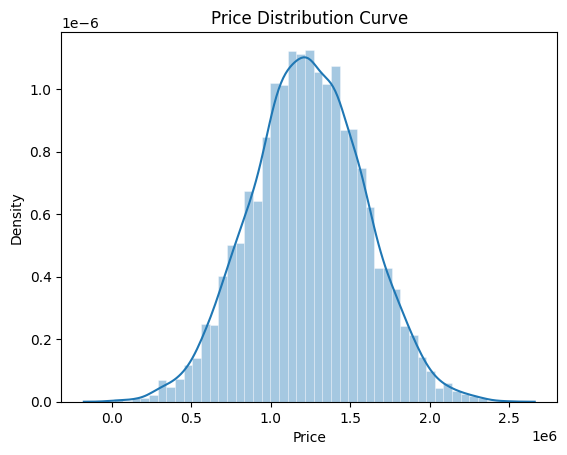

In [3]:
import seaborn as sns

plt.title('Price Distribution Curve')
sns.histplot(df_house['Price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

### Preprocessing
Before applying regression, we need to preprocess the data first.

#### Dropping Columns
We can drop the address column since it does not have an impact on house prices. One could argue that a specific address or street could raise or lower the price of the house, but it is far too specific for a regression model that predicts price, and therefore we can drop it.

In [4]:
df_house = df_house.drop(['Address'], axis=1)
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


#### Missing Values
Need to check for missing values and handle them accordingly. In this dataset it appears no values are missing, so we do not need to take action.

In [5]:
missing_values = df_house.isna().sum()
print(missing_values)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


#### Normalization & Outliers
For preprocessing, it's important to remove outliers as it could negatively affect the regression model. To remove outliers, we will normalize the dataset first and remove outliers. In this case, we remove 57 entries. 

In [6]:
# Normalize
normal_df = (df_house - df_house.mean())/df_house.std()

# Remove Outliers
normal_df = normal_df.loc[((normal_df > -3).sum(axis=1)==6) & ((normal_df <= 3).sum(axis=1)==6)]

print('Entries before outliers = %d' % (df_house.shape[0]))
print('Entries after outliers = %d' % (normal_df.shape[0]))

Entries before outliers = 5000
Entries after outliers = 4943


### Scatter Plot
Now that the data has been preprocessed we can show a scatter plot. For simple linear regression, we can see relationship between the average area income and the price of the house. As an initial observation, there is a slight linear relationship, though the points are very scattered. 

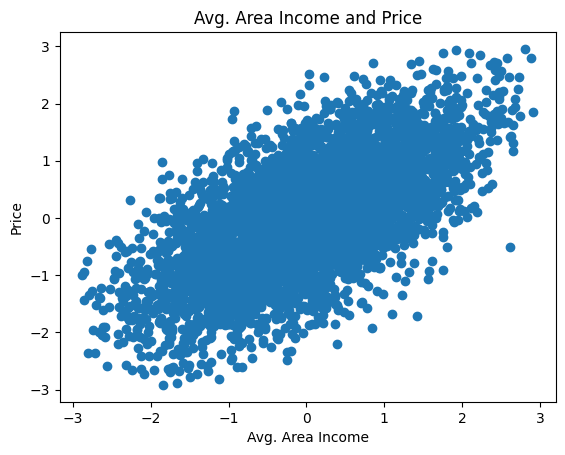

In [7]:
plt.scatter(normal_df['Avg. Area Income'], normal_df['Price'])
plt.title('Avg. Area Income and Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

In [8]:
# Split into training and testing data

X = normal_df[['Avg. Area Income']]
y = normal_df['Price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

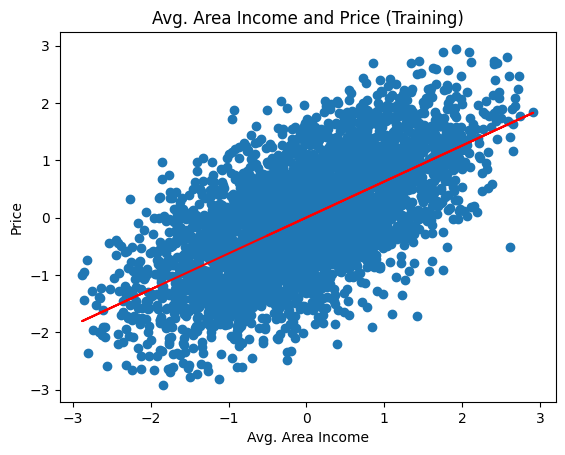

In [10]:
# Prediction on training set

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.title('Avg. Area Income and Price (Training)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

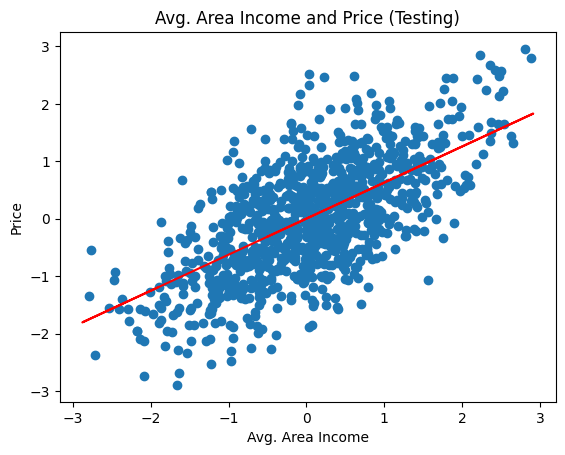

In [11]:
# Prediction on test set

plt.scatter(X_test, y_test)
plt.plot(X_train, y_pred_train, color = 'red')
plt.title('Avg. Area Income and Price (Testing)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()